In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Quiz 2 Estadística II y Diseño de Experimentos

Se conduce un experimento con el fin de determinar la conservación en días de un **producto lácteo** empacado por tres tipos de trabajadores, 3 tipos de botellas y en tres formas de almacenamiento. Como variables de respuesta se presenta los días que el producto permanece en buenas condiciones. A continuación se muestran los datos obtenidos:

**1. Construya adecuadamente una arquitectura de datos que le permita analizar la información obtenida. La arquitectura debe presentarla en Excel y reportarla en el exámen**

In [161]:
# Cargamos los datos desde nuestra hoja de cálculo
df = pd.read_excel('../files/quiz_3.xlsx', sheet_name=1) 
df.head(40)

,trabajador,tipo_botella,replica,tipo_almacenamiento,duracion
0,t1,plastico,R1,permanent,3.45
1,t1,plastico,R1,end_aisle,4.14
2,t1,plastico,R1,cooler,5.80
3,t1,plastico,R2,permanent,3.36
4,t1,plastico,R2,end_aisle,4.19
5,t1,plastico,R2,cooler,5.23
6,t1,vidrio-28,R1,permanent,4.07
7,t1,vidrio-28,R1,end_aisle,4.38
8,t1,vidrio-28,R1,cooler,5.48
9,t1,vidrio-28,R2,permanent,3.52


In [106]:
# Mostramos los estadisticos generales para las variables numéricas, en este caso la duración en dias
df.describe()

,duracion
count,54.000000
mean,4.697037
std,0.756194
min,3.360000
25%,4.175000
50%,4.525000
75%,5.147500
max,6.380000


**2. ¿Existen diferencias estadísticas entre los tipos de trabajadores? Plantee adecuadamente la pruebas de hipótesis y haga el cálculo manual y utilizando el software R con un 96.5% de confianza ¿Qué puede concluir respecto al valor P y al estadístico de prueba? Sugerencia: construya también el diagrama de cajas y bigotes**

### Solución

Significancia = 0.035 

Planteamiento de la hipotesis

$H_0 : \mu_{t1} = \mu_{t2} = \mu_{t3}$  
$H_a : $ Al menos una es diferentes

De acuerdo a los estadísticos obtenidos mas arriba las médias de duración de las muestras para cada trabajador son: 
  
$\mu_{t1} = 4.47$  
$\mu_{t2} = 5.23$  
$\mu_{t3} = 4.39$  
  
Como tenemos tres medias para comparar, debemos crear nuestra tabla Anova para determinar cual es diferente de los demás

In [121]:
# Agrupamos los datos por trabajador y tomamos los valores sólo de la columna de duración
g = df.groupby('trabajador')
duracion_t1 = g.get_group('t1')['duracion'].values
duracion_t2 = g.get_group('t2')['duracion'].values
duracion_t3 = g.get_group('t3')['duracion'].values

In [122]:
f, p = stats.f_oneway(duracion_t1,duracion_t2
                      ,duracion_t3)

In [123]:
print('Estadistico de prueba: {}'.format(f))
print('Valor de P: {}'.format(p))

Estadistico de prueba: 8.629705786668223
Valor de P: 0.0005914182430628186


Como el valor de p (0.000591) es menor que la significancia (0.035), al menos hay un trabajador diferente a los demás; para determinar cual es éste trabajador dirferente a los demás nos apoyamos en el diagrama de cajas

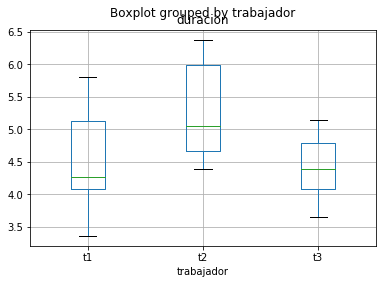

In [124]:
#Mostramos un diagrama de cajas para hacernos una idea general
df.boxplot('duracion', by = 'trabajador')

El trabajador diferente a los demás es el trabajador 2, quien tiene un efecto significativo en la duración media de los productos

Tabla Anova 

**3. ¿Es posible decir que existen diferencias estadísticas entre el tipo de conservación de las botellas (permanent, End Aisle y Cooler? Plantee adecuadamente las pruebas de hipótesis y concluya con un 97% de confianza utilizando el criterio del valor-P. Muestre el procedimiento que hizo en R**

### Solución

Significancia = 0.03

Planteamiento de la hipotesis

$H_0 : \mu_{b1} = \mu_{b2} = \mu_{b3}$  
$H_a : $ Al menos una es diferentes

De acuerdo a los estadísticos obtenidos mas arriba las médias de duración de las muestras para cada botella son: 
  
$\mu_{b1} = 4.597777777777777$  
$\mu_{b2} = 4.683333333333334$  
$\mu_{b3} = 4.8100000000000005$  
  
 
Como tenemos tres medias para comparar, debemos crear nuestra tabla Anova para determinar cual es diferente de los demás

In [129]:
# Agrupamos los datos por tipos de botella y tomamos los valores sólo de la columna de duración
g = df.groupby('tipo_botella')
duracion_b1 = g.get_group('plastico')['duracion'].values
duracion_b2 = g.get_group('vidrio-28')['duracion'].values
duracion_b3 = g.get_group('vidrio-38')['duracion'].values
g.get_group('plastico')['duracion'].values.mean(), g.get_group('vidrio-28')['duracion'].values.mean(),g.get_group('vidrio-38')['duracion'].values.mean()

(4.597777777777777, 4.683333333333334, 4.8100000000000005)

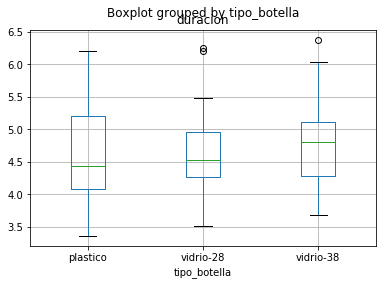

In [78]:
df.boxplot('duracion', by = 'tipo_botella')

In [79]:
f_b, p_b = stats.f_oneway(duracion_b1,duracion_b2,duracion_b3)
f_b, p_b # Estadístico de prueba y valor de P para los tratamientos

(0.3500601705290027, 0.7063254644449336)

In [80]:
# Agrupamos los datos por tipos de almacenamiento y tomamos los valores sólo de la columna de duración
g = df.groupby('tipo_almacenamiento')
duracion_a1 = g.get_group('permanent')['duracion'].values
duracion_a2 = g.get_group('end_aisle')['duracion'].values
duracion_a3 = g.get_group('cooler')['duracion'].values

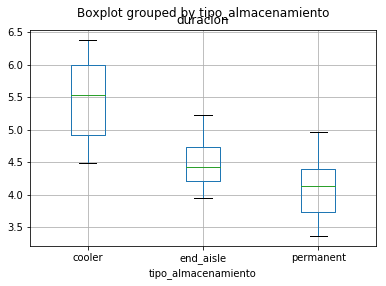

In [81]:
df.boxplot('duracion', by = 'tipo_almacenamiento')

In [87]:
f_a, p_a = stats.f_oneway(duracion_a1,duracion_a2,duracion_a3)
f_a, p_a # Estadístico de prueba y valor de P para los tratamientos

(36.052943248321014, 1.7415244795596215e-10)

In [94]:
# Agrupamos los datos por tipos de botella y tomamos los valores sólo de la columna de duración
g = df.groupby('replica')
duracion_r1 = g.get_group('R1')['duracion'].values
duracion_r2 = g.get_group('R2')['duracion'].values


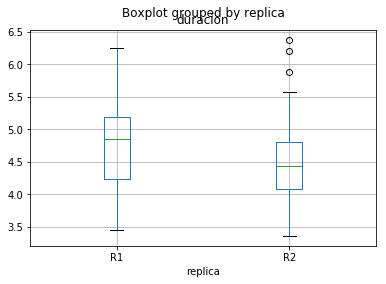

In [96]:
df.boxplot('duracion', by = 'replica')

In [95]:
f_r, p_r = stats.f_oneway(duracion_r1,duracion_r2)
f_r, p_r # Estadístico de prueba y valor de P para los tratamientos

(1.9023900218771796, 0.1737144835452196)

In [158]:
df[(df['trabajador'] == 't2') & (df['tipo_botella'] == 'vidrio-38') & (df['tipo_almacenamiento'] == 'cooler')]

,trabajador,tipo_botella,replica,tipo_almacenamiento,duracion
32,t2,vidrio-38,R1,cooler,6.03
35,t2,vidrio-38,R2,cooler,6.38


** 5. ¿Cuál es el trabajador, el tipo de botella y el tipo de almacenamiento que maximiza el tiempo de conservación? Construya la tabla ANOVA y las respectivas gráficas de interacción. Interprete los resultados con un 95% de confianza. **

el trabajador: t2
el tipo de botella: vidrio-38
el tipo de almacenamiento: cooler

In [104]:
df

,trabajador,tipo_botella,replica,tipo_almacenamiento,duracion
0,t1,plastico,R1,permanent,3.45
1,t1,plastico,R1,end_aisle,4.14
2,t1,plastico,R1,cooler,5.80
3,t1,plastico,R2,permanent,3.36
4,t1,plastico,R2,end_aisle,4.19
5,t1,plastico,R2,cooler,5.23
6,t1,vidrio-28,R1,permanent,4.07
7,t1,vidrio-28,R1,end_aisle,4.38
8,t1,vidrio-28,R1,cooler,5.48
9,t1,vidrio-28,R2,permanent,3.52
